In [ ]:
!pip install ultralytics -q
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8s.pt")

In [ ]:
results = model.train(
    data="/content/drive/MyDrive/fd_dataset1/YOLO/data.yaml",  # path to your dataset YAML
    epochs=5,        # increase for better results (100+ if you have time)
    imgsz=640,
    batch=16,
    workers=2,
    project="runs/fabric_defect",
    name="yolov8s_fd"
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/fd_dataset1/YOLO/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_fd, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
metrics = model.val()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 27.4±9.6 MB/s, size: 72.1 KB)
val: Scanning /content/drive/MyDrive/fd_dataset1/YOLO/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 73/73 29.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 0.1it/s 51.1s
                   all         73         81      0.642      0.628      0.715       0.37
                     0         25         30      0.567      0.733      0.738      0.421
                     1         18         18      0.637      0.833      0.836      0.404
                     2         15         15      0.401      0.447      0.478      0.211
                     3         16         18      0.962        0.5      0.807      0.443
Speed: 2.0ms preprocess, 671.

In [ ]:
import pandas as pd

In [ ]:
results_csv = "/content/runs/fabric_defect/yolov8s_fd/results.csv"
df = pd.read_csv(results_csv)

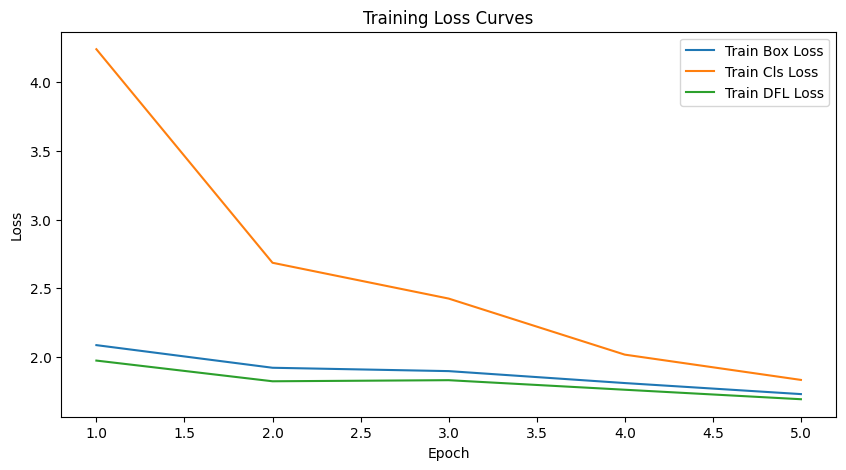

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['train/box_loss'], label="Train Box Loss")
plt.plot(df['epoch'], df['train/cls_loss'], label="Train Cls Loss")
plt.plot(df['epoch'], df['train/dfl_loss'], label="Train DFL Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.show()

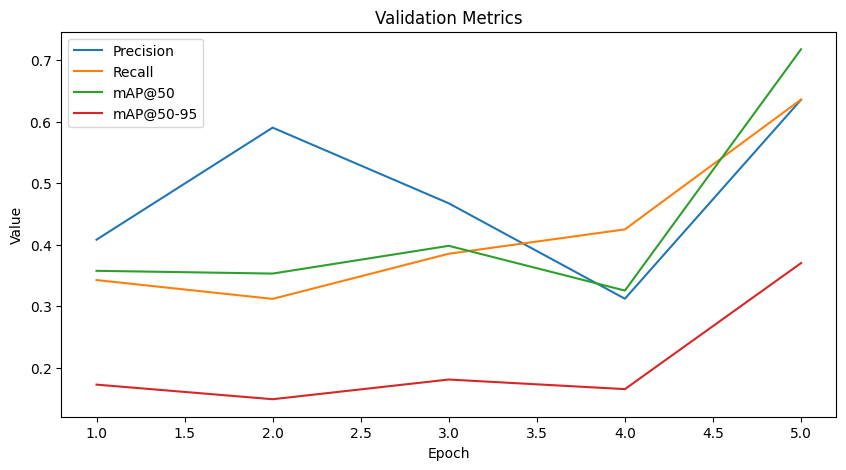

In [ ]:
# Plot precision, recall, mAP
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['metrics/precision(B)'], label="Precision")
plt.plot(df['epoch'], df['metrics/recall(B)'], label="Recall")
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@50")
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label="mAP@50-95")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Validation Metrics")
plt.show()

In [ ]:
test_images = "/content/drive/MyDrive/fd_dataset1/YOLO/test/images/photo_2023-11-19_18-11-56_jpg.rf.605344bc7d871fa9d9438425e3733fe8.jpg"
results = model.predict(source=test_images, save=True, conf=0.25)
print("✅ Test predictions saved at:", results[0].save_dir)


image 1/1 /content/drive/MyDrive/fd_dataset1/YOLO/test/images/photo_2023-11-19_18-11-56_jpg.rf.605344bc7d871fa9d9438425e3733fe8.jpg: 640x640 (no detections), 593.8ms
Speed: 3.0ms preprocess, 593.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/fabric_defect/yolov8s_fd3
✅ Test predictions saved at: /content/runs/fabric_defect/yolov8s_fd3


In [ ]:
image_path = "/content/drive/MyDrive/fd_dataset1/YOLO/test/images/photo_2023-11-19_18-10-21_jpg.rf.551afcea08d9bf8b00447d5945d2d1d2.jpg"
results = model.predict(source=image_path, save=True, conf=0.25)


image 1/1 /content/drive/MyDrive/fd_dataset1/YOLO/test/images/photo_2023-11-19_18-10-21_jpg.rf.551afcea08d9bf8b00447d5945d2d1d2.jpg: 640x640 1 0, 876.9ms
Speed: 3.2ms preprocess, 876.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/fabric_defect/yolov8s_fd4


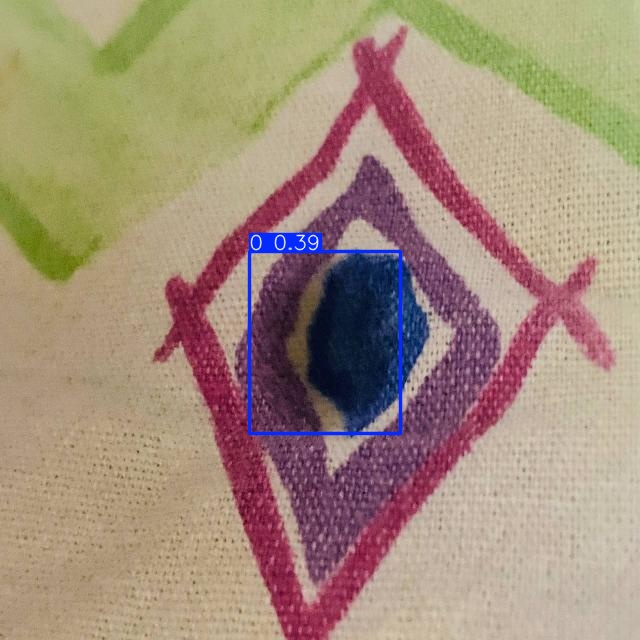

In [ ]:
from pathlib import Path
from IPython.display import Image, display

save_dir = Path(results[0].save_dir)  # convert to Path
output_image = save_dir / Path(image_path).name

display(Image(filename=output_image))


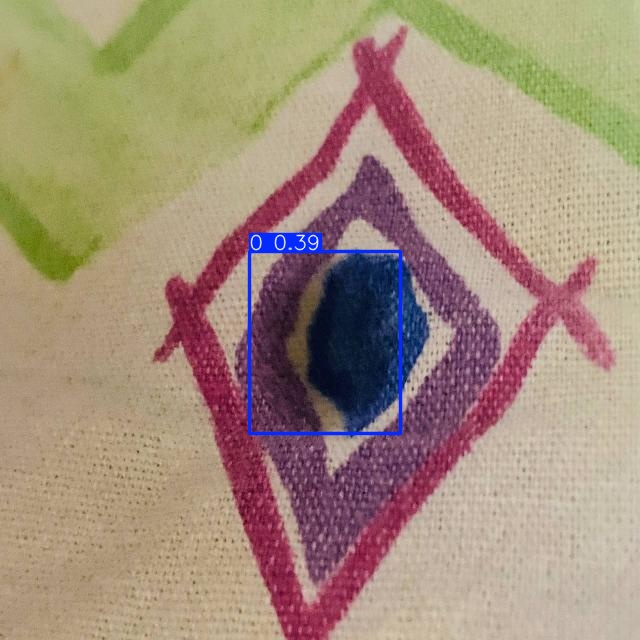

In [ ]:
from IPython.display import Image, display
from pathlib import Path # Import Path

save_dir = Path(results[0].save_dir) # Convert save_dir to a Path object
output_image = save_dir / image_path.split("/")[-1]
display(Image(filename=output_image))

In [ ]:
model1 = YOLO("/content/runs/fabric_defect/yolov8s_fd/weights/best.pt")

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving photo_2024-02-11_15-19-09_jpg.rf.3825c13ee466321f92ebe729140bbfae.jpg to photo_2024-02-11_15-19-09_jpg.rf.3825c13ee466321f92ebe729140bbfae.jpg


In [ ]:
results1 = model1.predict(source=image_path, save=True, conf=0.25)


image 1/1 /content/photo_2024-02-11_15-19-09_jpg.rf.3825c13ee466321f92ebe729140bbfae.jpg: 640x640 1 2, 550.0ms
Speed: 2.7ms preprocess, 550.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


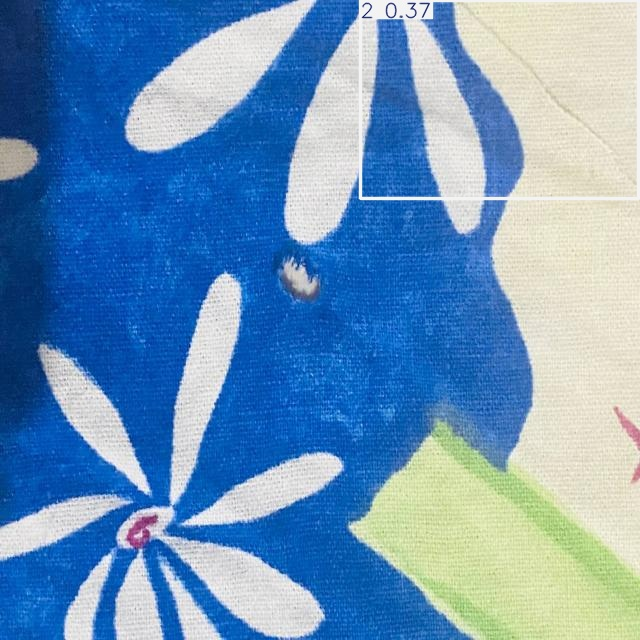

In [ ]:
from pathlib import Path
from IPython.display import Image, display

# Convert save_dir into a Path object
save_dir = Path(results1[0].save_dir)

# Join with the image filename properly
output_image = save_dir / Path(image_path).name

# Display the detected output image
display(Image(filename=str(output_image)))

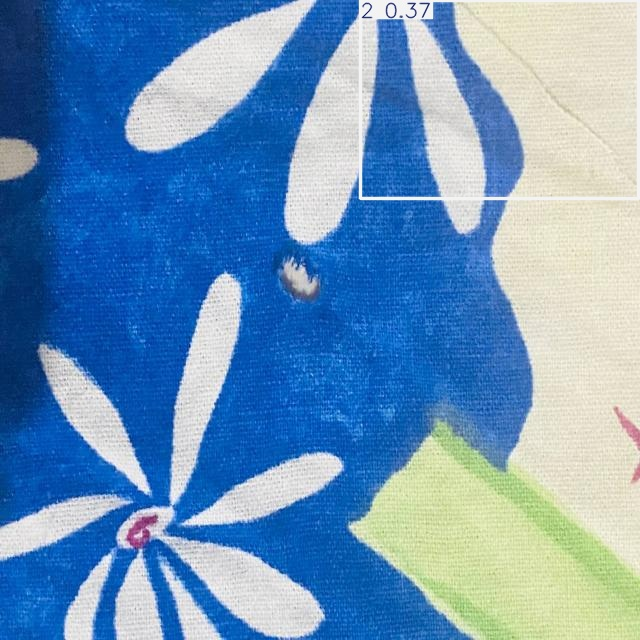

In [ ]:
from pathlib import Path # Import Path

output_image = Path(results1[0].save_dir) / image_path.split("/")[-1]
display(Image(filename=output_image))